# CDS6314 Data Mining Assignment – Group TT2L_G2

# Association Rule Mining on Marital Satisfaction Dataset

### Members: 
#### 242UC24514 Melvin Siaw Jian Cheng, 
#### 242UC24512 Chong Jien Sheng, 
#### 242UC24515 Tong Jian Hao, 
#### 1191202487 Ng Siew Yang

### Section:
#### 4 refined exploratory questions
#### 3 feature engineering methods (construction, selection, PCA)
#### 5 machine‐learning models
### Full evaluation & interpretability cells

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('Marital-satisfaction_Data (1).csv')
df.columns = df.columns.str.strip()  # remove trailing spaces

In [72]:
df = pd.read_csv("Marital-satisfaction_Data (1).csv")
df.head()

,Country,Gender,Age,Marriage_years,children,brought_up_children,Education,Material_status,Religion,Religiosity,...,KMSS2,KMSS3,Scale1,Scale2,Scale3,Scale4,Scale5,Scale6,Scale7,Scale8
0,Brazil,1,21.0,2.0,0,0,5,0,1.0,4,...,7,7,1,1,1,1,1,1,1,1
1,Brazil,1,29.0,3.0,1,0,5,3,1.0,6,...,6,6,2,1,1,1,1,1,1,1
2,Brazil,1,30.0,7.0,0,0,5,3,1.0,4,...,7,7,2,1,2,1,1,1,1,1
3,Brazil,1,30.0,7.0,1,1,5,3,1.0,6,...,6,6,3,1,1,2,1,1,1,1
4,Brazil,1,28.0,9.0,0,0,4,2,1.0,5,...,6,7,3,2,3,2,1,1,1,1


In [73]:
# Display all column names
print("🧾 Columns:\n", df.columns.tolist())

🧾 Columns:
 ['Country ', 'Gender', 'Age', 'Marriage_years', 'children', 'brought_up_children', 'Education', 'Material_status', 'Religion', 'Religiosity', 'Pension', 'Love1', 'happy', 'Esteem1', 'Love2', 'Love3', 'Esteem2', 'self_R', 'Love4', 'Love5', 'KMSS1', 'KMSS2', 'KMSS3', 'Scale1', 'Scale2', 'Scale3', 'Scale4', 'Scale5', 'Scale6', 'Scale7', 'Scale8']


In [74]:
# Show basic information about the dataset
print("\n📦 Dataset Info:")
df.info()


📦 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              7178 non-null   object 
 1   Gender               7178 non-null   int64  
 2   Age                  7178 non-null   float64
 3   Marriage_years       7178 non-null   float64
 4   children             7178 non-null   int64  
 5   brought_up_children  7178 non-null   int64  
 6   Education            7178 non-null   int64  
 7   Material_status      7178 non-null   int64  
 8   Religion             7092 non-null   float64
 9   Religiosity          7178 non-null   int64  
 10  Pension              7178 non-null   int64  
 11  Love1                7178 non-null   int64  
 12  happy                7178 non-null   int64  
 13  Esteem1              7178 non-null   int64  
 14  Love2                7178 non-null   int64  
 15  Love3                

In [75]:
# Display summary statistics for numeric columns
print("\n📈 Descriptive Statistics:")
print(df.describe())


📈 Descriptive Statistics:
            Gender          Age  Marriage_years     children  \
count  7178.000000  7178.000000     7178.000000  7178.000000   
mean      1.533157    40.665018       14.760102     1.766648   
std       0.498934    11.446824       11.587541     1.307748   
min       1.000000    17.000000        0.080000     0.000000   
25%       1.000000    32.000000        5.000000     1.000000   
50%       2.000000    39.000000       12.000000     2.000000   
75%       2.000000    49.000000       23.000000     2.000000   
max       2.000000    88.000000       70.000000    12.000000   

       brought_up_children    Education  Material_status     Religion  \
count          7178.000000  7178.000000      7178.000000  7092.000000   
mean              1.466982     4.242965         2.616188     4.009588   
std               1.383066     0.949635         0.838797     3.020014   
min               0.000000     1.000000         0.000000     1.000000   
25%               0.000000     

In [76]:
# Show value counts for the first few columns (you can expand this)
for col in df.columns[:5]:
    print(f"\n🔢 Value Counts for {col}:")
    print(df[col].value_counts())


🔢 Value Counts for Country :
Country 
Croatia         611
Iran            605
Nigeria         594
Brazil          481
Poland          444
Turkey          392
Italy           316
India           299
Portugal        281
Hungary         236
Slovakia        234
Russia          224
Spain           200
Saudi Arabia    199
Switzerland     172
Mexico          168
Estonia         150
Pakistan        131
Kazakhstan      120
China           119
Ghana           103
Bulgaria        102
Germany         101
South Korea     100
U.K.            100
Uganda           99
Malaysia         99
HongKong         99
Greece           95
Kenia            94
Indonesia        88
Canada           69
Romania          53
Name: count, dtype: int64

🔢 Value Counts for Gender:
Gender
2    3827
1    3351
Name: count, dtype: int64

🔢 Value Counts for Age:
Age
30.0    320
32.0    287
35.0    287
40.0    264
34.0    233
       ... 
85.0      1
81.0      1
84.0      1
17.0      1
38.5      1
Name: count, Length: 73, dtype: i

C:\Users\melvi\AppData\Local\Temp\ipykernel_440\1633702446.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\melvi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


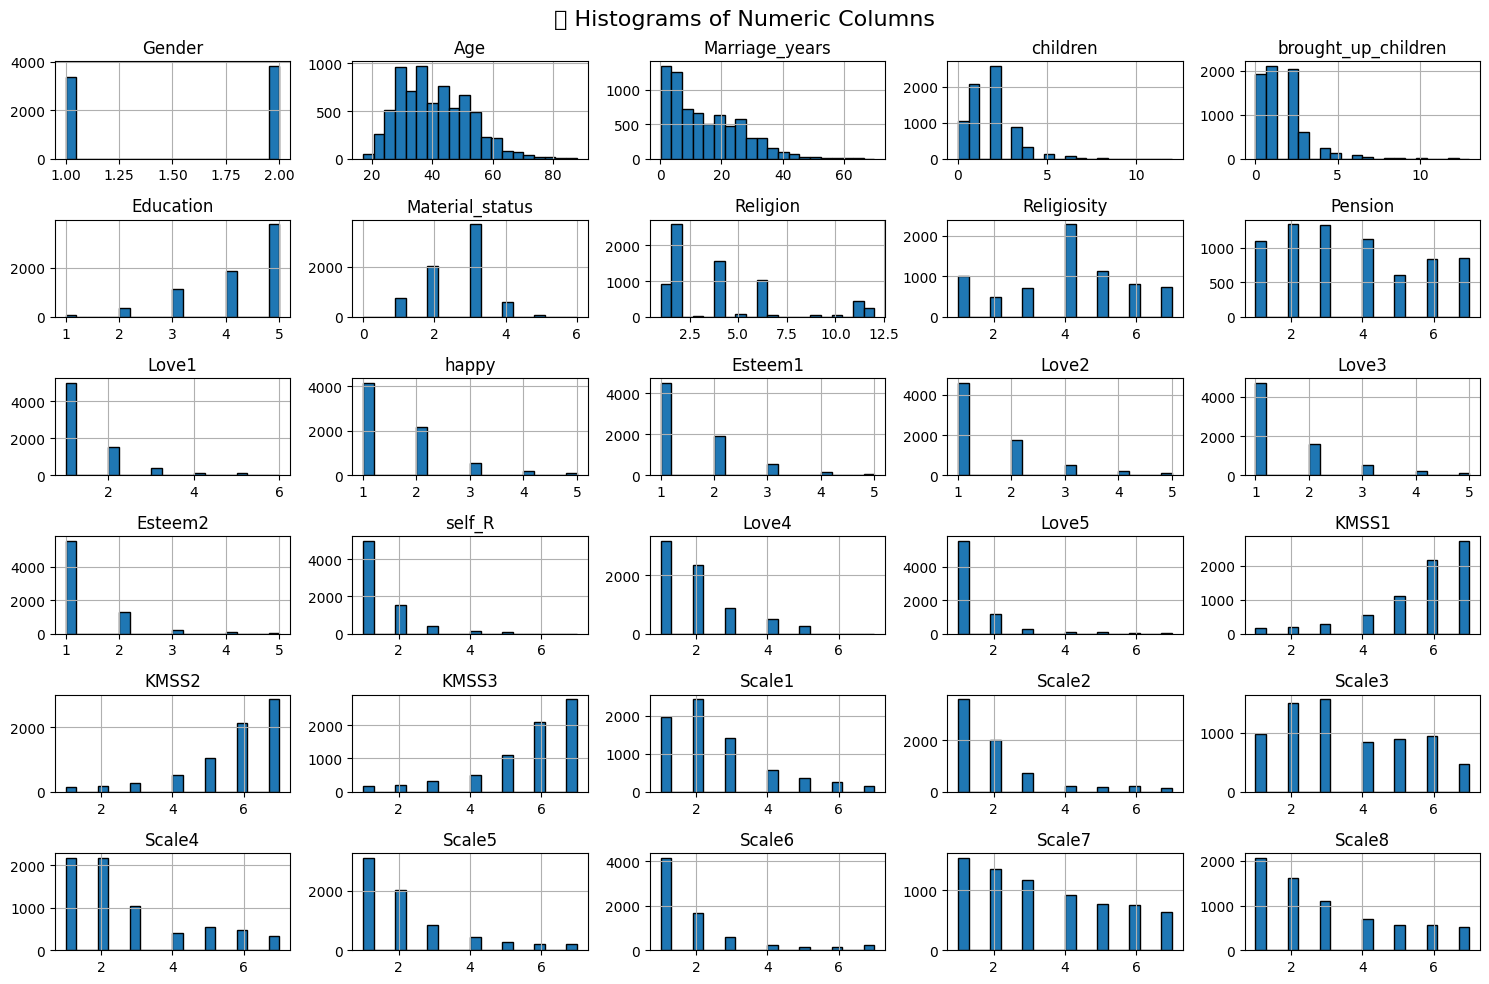

In [77]:
# Plot histograms for all numeric columns
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("📊 Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\melvi\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


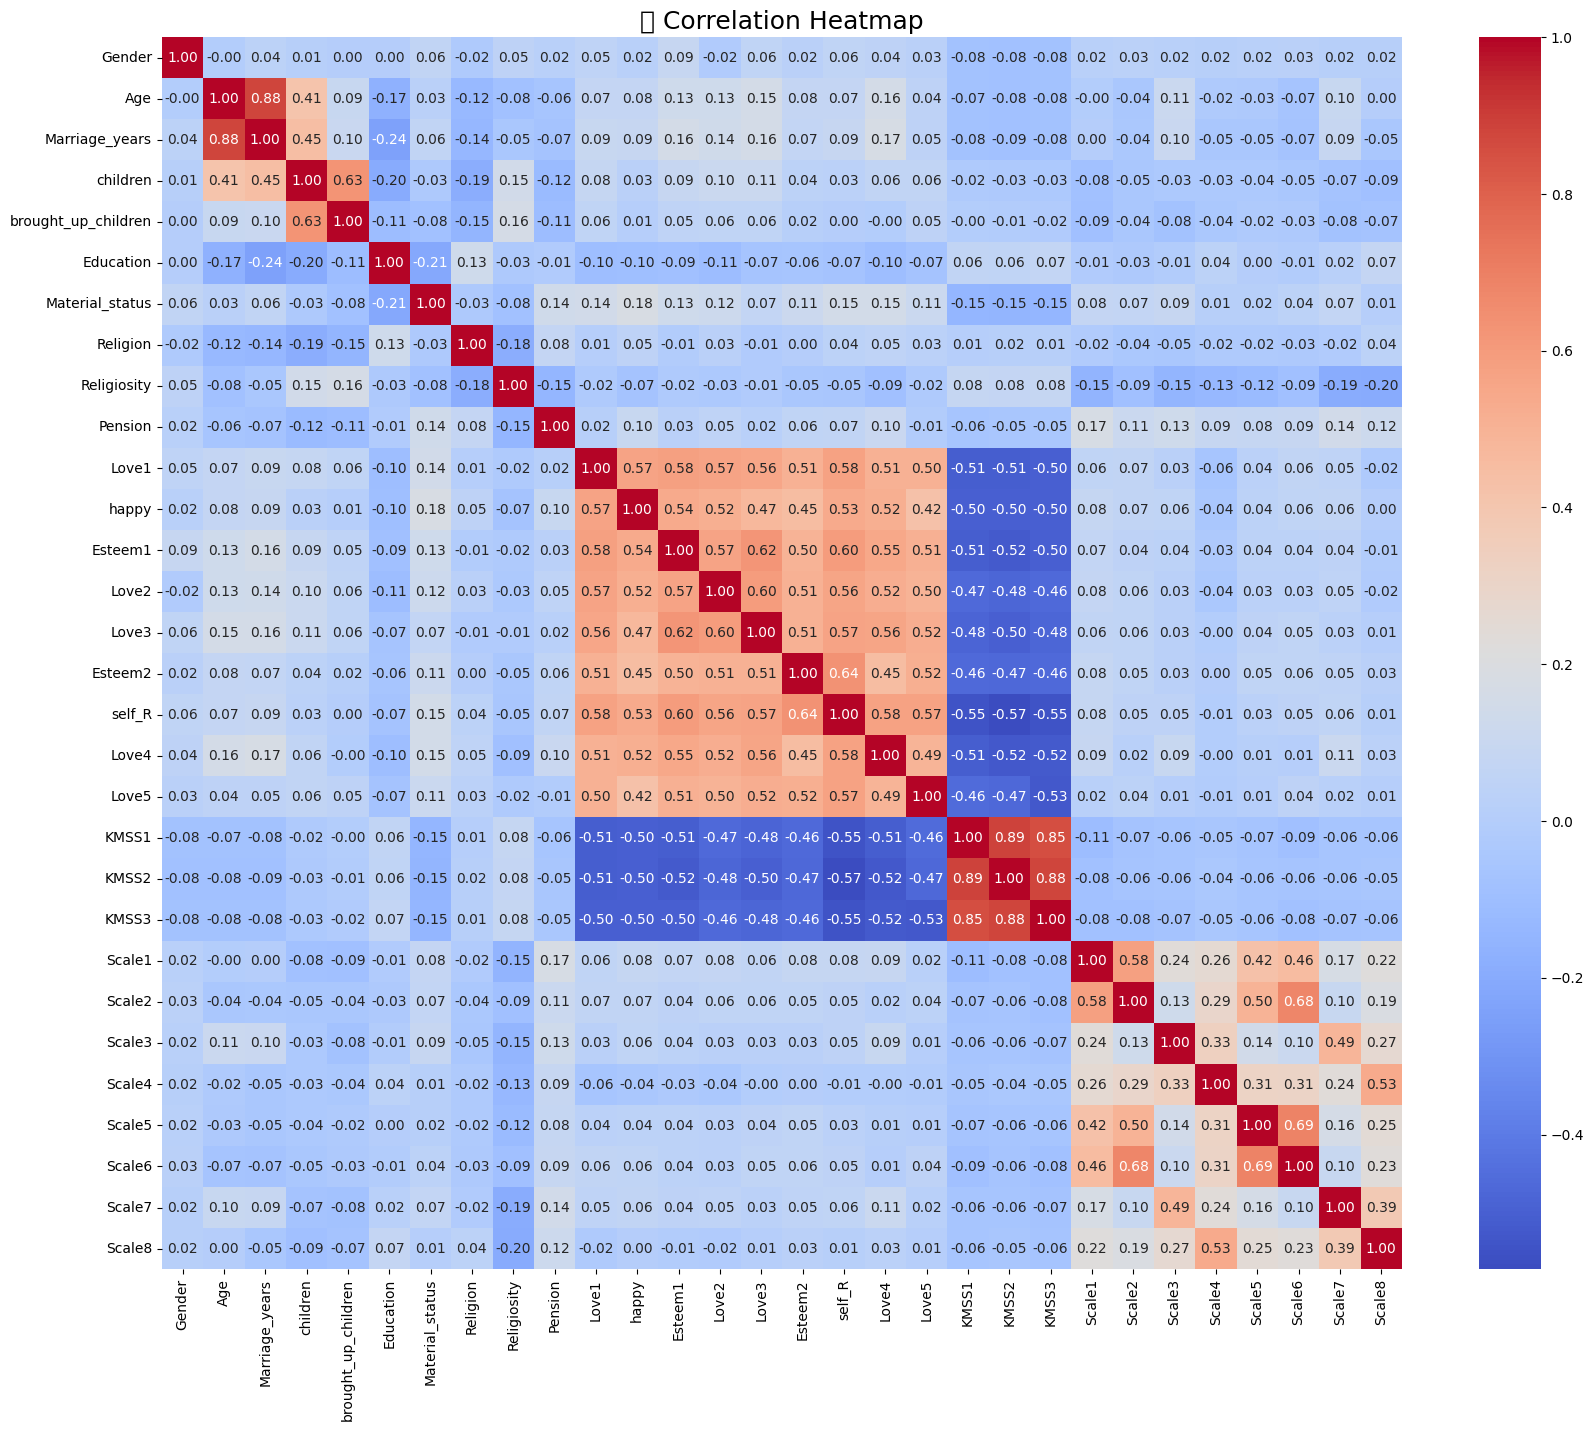

In [78]:
# Plot correlation heatmap for numeric columns
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("🔥 Correlation Heatmap", fontsize=18)
plt.show()

In [79]:
df = df.dropna()
# total number of NaN cells
print(df.isna().sum().sum())  

0


### Exploratory Questions

1. **Q1:** Do respondents with **high personal collectivism** (`self_R` ≥ median) but **low societal collectivism** (`Scale3` < median) report **greater romantic involvement** (mean of `Love1`–`Love5` ≥ median)?  
2. **Q2:** Is **“High” marital satisfaction** (`satisfaction_avg` ≥ 5) more common among those with **no children** (`children = 0`) **and** **tertiary education** (`Education` ≥ 4)?  
3. **Q3:** Among respondents who are **religious** (`Religiosity` ≥ 5) but **financially struggling** (`Material_status` ≤ 2), is **emotional bonding** (`emotional_bonding` = mean(`Esteem1`,`Love5`) ≥ median) still strong?  
4. **Q4:** Does belief that **aging parents should live with children** (`Scale3` ≥ median) correlate with **higher satisfaction** (`satisfaction_avg` ≥ 5) in marriages **longer than median** (`Marriage_years` > median)?  

In [80]:
# Cell 4: Impute Missing Values (median)
df = df.fillna(df.median(numeric_only=True))

In [81]:
# Feature Construction & Label Creation
# satisfaction_avg (1–7 scale) and emotional_bonding
df["satisfaction_avg"] = df[["KMSS1","KMSS2","KMSS3"]].mean(axis=1)
df["emotional_bonding"]  = df[["Esteem1","Love5"]].mean(axis=1)

# 2 label_satisfaction
def label_satisfaction(score):
    if score >= 5:
        return "High"
    elif score <= 3:
        return "Low"
    else:
        return "Neutral"

df["satisfaction_label"] = df["satisfaction_avg"].apply(label_satisfaction)

# 3 keep only High & Low
df = df[df["satisfaction_label"] != "Neutral"].reset_index(drop=True)
print("After label & filter:", df.shape)


After label & filter: (6314, 34)


### Quick EDA addressing Q1–Q4

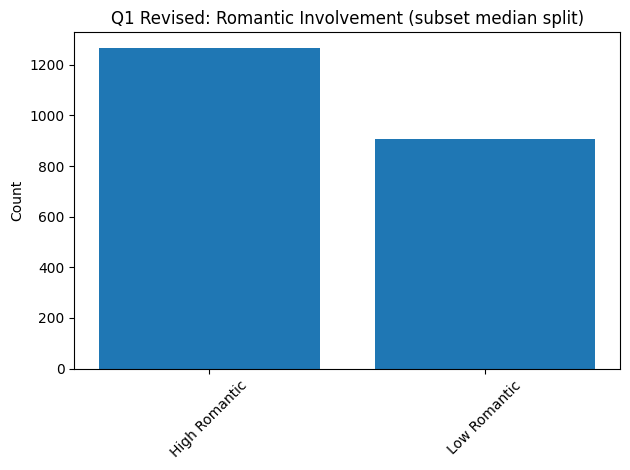

In [82]:
# Q1: High self_R & Low Scale3 → Romantic Involvement (subset‐median split)
sub1 = df[(df["self_R"] >= df["self_R"].median()) & (df["Scale3"] < df["Scale3"].median())]
romant = sub1[[f"Love{i}" for i in range(1,6)]].mean(axis=1)
med_romant_sub1 = romant.median()

cat1 = (romant >= med_romant_sub1).map({True: "High Romantic", False: "Low Romantic"})
counts1 = cat1.value_counts().reindex(["High Romantic", "Low Romantic"])

plt.figure()
plt.bar(counts1.index, counts1.values)
plt.title("Q1 Revised: Romantic Involvement (subset median split)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

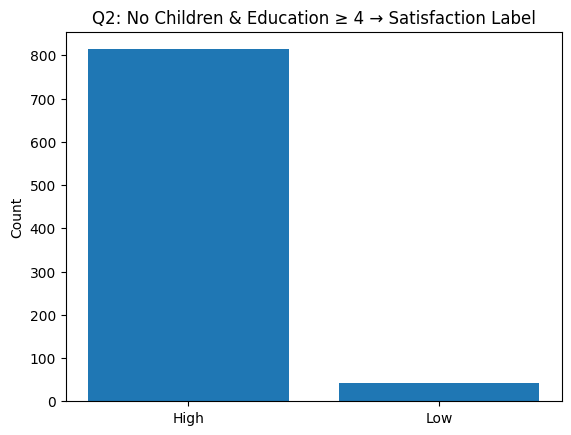

In [83]:
# Q2: No children & Tertiary education → Satisfaction Label

# 1. Subset
sub2 = df[(df["children"] == 0) & (df["Education"] >= 4)]

# 2. Count High vs Low satisfaction
counts2 = sub2["satisfaction_label"].value_counts().reindex(["High","Low"])

# 3. Plot
plt.figure()
plt.bar(counts2.index, counts2.values)
plt.title("Q2: No Children & Education ≥ 4 → Satisfaction Label")
plt.ylabel("Count")
plt.show()


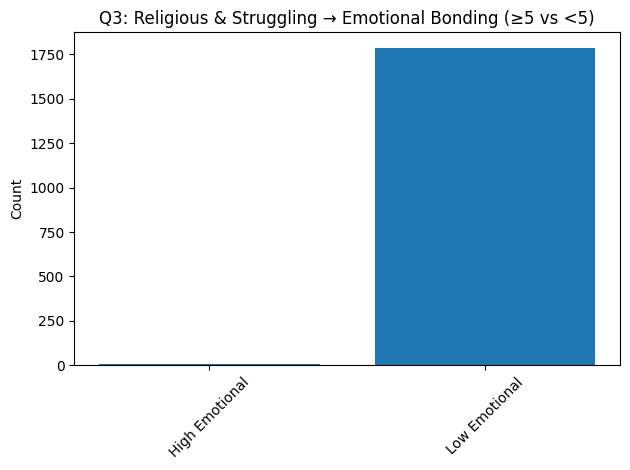

In [84]:
# Q3 Revised: use an absolute cutoff of 5 for strong emotional bonding
import matplotlib.pyplot as plt

# 1. Define subgroup
sub3 = df[(df["Religiosity"] >= df["Religiosity"].median()) &
          (df["Material_status"] <= 2)]

# 2. Categorize by absolute threshold
threshold = 5
cat3 = sub3["emotional_bonding"].apply(
    lambda x: "High Emotional" if x >= threshold else "Low Emotional"
)
counts3 = cat3.value_counts().reindex(
    ["High Emotional", "Low Emotional"], fill_value=0
)

# 3. Plot
plt.figure()
plt.bar(counts3.index, counts3.values)
plt.title("Q3: Religious & Struggling → Emotional Bonding (≥5 vs <5)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


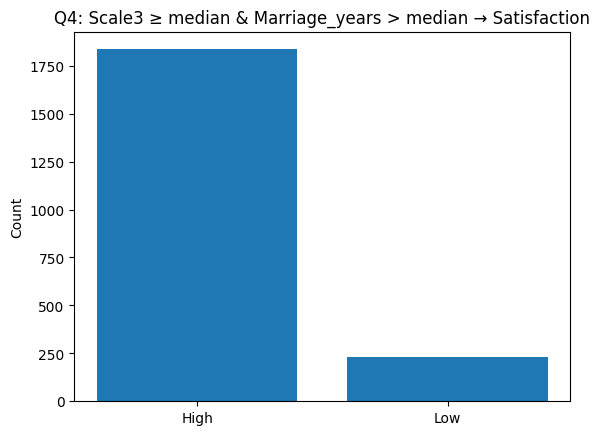

In [85]:
# Q4: Scale3 ≥ median & Long Marriages → Satisfaction Label

# 1. Compute medians
median_mar    = df["Marriage_years"].median()
median_scale3 = df["Scale3"].median()     

# 2. Subset
sub4 = df[
    (df["Scale3"]          >= median_scale3) &
    (df["Marriage_years"]  >  median_mar)
]

# 3. Count High vs Low satisfaction
counts4 = sub4["satisfaction_label"] \
    .value_counts() \
    .reindex(["High","Low"])

# 4. Plot
plt.figure()
plt.bar(counts4.index, counts4.values)
plt.title("Q4: Scale3 ≥ median & Marriage_years > median → Satisfaction")
plt.ylabel("Count")
plt.show()


## Feature Engineering (3 types)

In [86]:
#Feature Construction already done: satisfaction_avg & emotional_bonding
# (we created these above in the code)
print("Constructed features: satisfaction_avg, emotional_bonding")

Constructed features: satisfaction_avg, emotional_bonding


In [87]:
#Feature Selection: SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

orig_feats = [
    "Gender","Age","Marriage_years","children","brought_up_children",
    "Education","Material_status","Religion","Religiosity","Pension",
    "Love1","happy","Esteem1","Love2","Love3","Esteem2","self_R","Love4","Love5",
    "emotional_bonding"
]

X_fs = df[orig_feats]
y_fs = (df["satisfaction_avg"] >= 5).astype(int)  # or label_satisfaction=="High"

# impute & encode
X_fs = X_fs.fillna(X_fs.median(numeric_only=True))
for col in X_fs.select_dtypes(include="object").columns:
    X_fs[col] = LabelEncoder().fit_transform(X_fs[col])

selector = SelectKBest(f_classif, k=10)
selector.fit(X_fs, y_fs)
top_feats = [f for f,sel in zip(orig_feats, selector.get_support()) if sel]
print("Top 10 features by ANOVA F:", top_feats)


Top 10 features by ANOVA F: ['Love1', 'happy', 'Esteem1', 'Love2', 'Love3', 'Esteem2', 'self_R', 'Love4', 'Love5', 'emotional_bonding']


In [88]:
# Dimensionality Reduction: PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scale X_fs
X_scaled = StandardScaler().fit_transform(X_fs)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio (5 comps):", pca.explained_variance_ratio_)


Explained variance ratio (5 comps): [0.31294913 0.12542772 0.07490366 0.0597118  0.0522635 ]


## Prepare Features & Label for Modeling


In [89]:
# Select final features (using top_feats + engineered)
features = top_feats  # or orig_feats, as you choose
X = df[features].fillna(df[features].median())
y = df["satisfaction_label"]

# encode y and X
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()
y_enc = le_y.fit_transform(y)  # Low→0, High→1

X_enc = X.copy()
for col in X_enc.select_dtypes(include="object").columns:
    X_enc[col] = LabelEncoder().fit_transform(X_enc[col])


## Train-Test Split & Scaling

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y_enc, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [91]:

# === Add emotional bonding features to modeling ===

# Define key emotional bonding variables based on needs mapping
emotional_vars = [
    "Love1", "Love2", "Love3", "Love4", "Love5",
    "Esteem1", "Esteem2"
]

demographic_vars = [
    "Gender", "Age", "Marriage_years",
    "children", "Education"
]

selected_features = emotional_vars + demographic_vars


# Prepare X and y
X = df[selected_features].copy()
# Convert labels to 0/1 numeric
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df["satisfaction_label"])

# Fill missing values
X = X.fillna(X.median(numeric_only=True))

# Encode any remaining categorical X columns
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Split & scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Features used:", selected_features)
print("X_train shape:", X_train_scaled.shape)



Features used: ['Love1', 'Love2', 'Love3', 'Love4', 'Love5', 'Esteem1', 'Esteem2', 'Gender', 'Age', 'Marriage_years', 'children', 'Education']
X_train shape: (5051, 12)


## Train & Evaluate 5 Models

In [92]:

from sklearn.naive_bayes    import GaussianNB
from sklearn.linear_model   import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from xgboost                import XGBClassifier
from sklearn.svm            import SVC
from sklearn.metrics        import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss"),
    "SVM": SVC(kernel="rbf", probability=True)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })

pd.DataFrame(results)


,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.892320,0.923758,0.892320,0.904143
1,Logistic Regression,0.953286,0.950011,0.953286,0.948468
2,Random Forest,0.951702,0.947955,0.951702,0.948494
3,XGBoost,0.944576,0.940947,0.944576,0.942246
4,SVM,0.950119,0.945987,0.950119,0.944974


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    RandomForestClassifier(), X_enc, y_enc,
    cv=5, scoring="f1_weighted"
)
print("5-fold F1 scores:", cv_scores)
print("Mean F1:", cv_scores.mean())

5-fold F1 scores: [0.91619944 0.93692509 0.93842519 0.94366373 0.92415012]
Mean F1: 0.931872713551629


## Confusion Matrix & Feature Importance

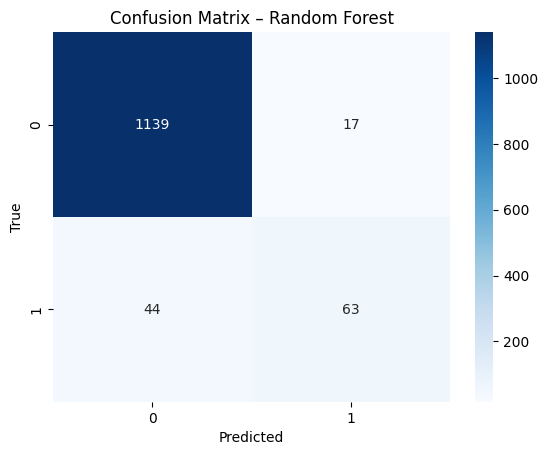

In [94]:
# Confusion matrix (using best model, e.g. Random Forest)
import seaborn as sns
from sklearn.metrics import confusion_matrix

best = models["Random Forest"]
y_best = best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


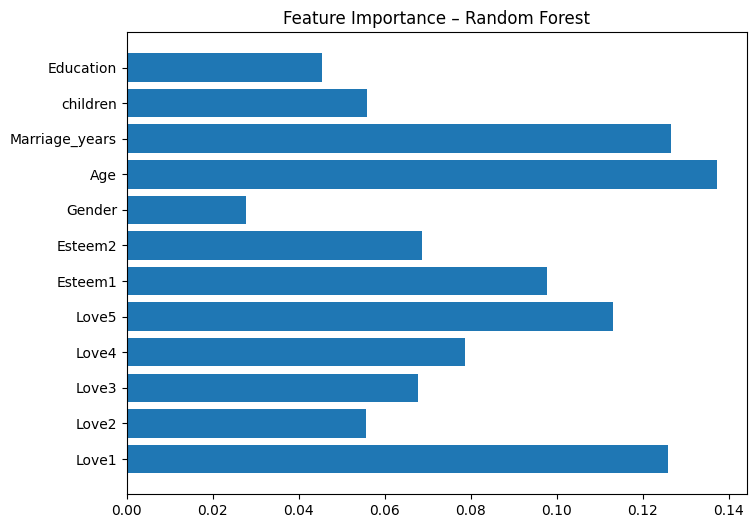

In [97]:
# Feature importance – Random Forest
import matplotlib.pyplot as plt

feat_imp = best.feature_importances_
plt.figure(figsize=(8,6))
plt.barh(selected_features, feat_imp)
plt.title("Feature Importance – Random Forest")
plt.show()


In [98]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Sample setup for model tuning (replace X_train, y_train with your variables)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


Best parameters found: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1156
           1       0.82      0.57      0.67       107

    accuracy                           0.95      1263
   macro avg       0.89      0.78      0.82      1263
weighted avg       0.95      0.95      0.95      1263

